# Assignment 4

In [27]:
# Import Essential Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Seaborn Style
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings

# Suppress all warnings
warnings.simplefilter('ignore')


In [3]:
# Initializing column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading Boston Housing Dataset
boston = pd.read_csv(r'../data/housing.csv', delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Features : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Features : 	 13
		Number of Samples : 	 506


# Exploratory Data Analysis

Let's Explore more on the data

In [5]:
# TODO : Descriptive Statistics on Boston Housing Dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# TODO : Check for null values and visualizing it using heatmap
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### There is no null values in any of the column

In [7]:
# TODO : Let's check for data types of all the columns
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### All are numerical values. So no need of encoding

<Axes: xlabel='MEDV', ylabel='Density'>

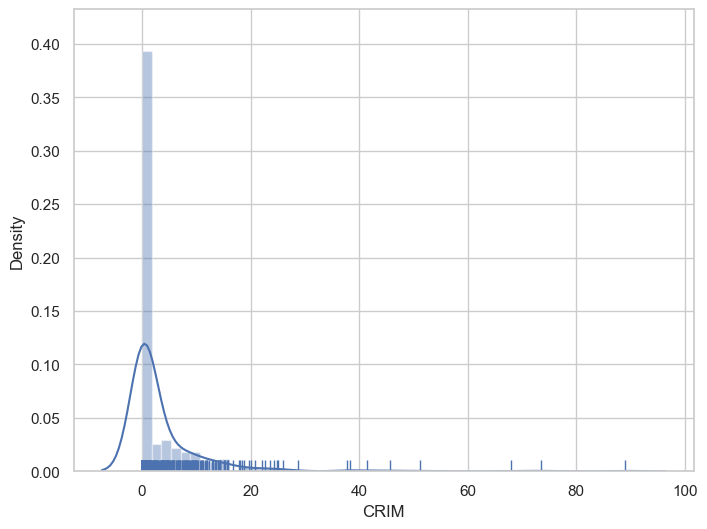

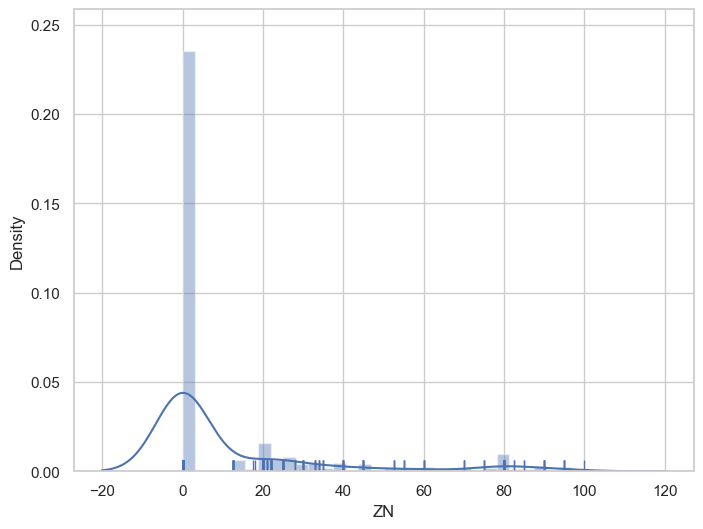

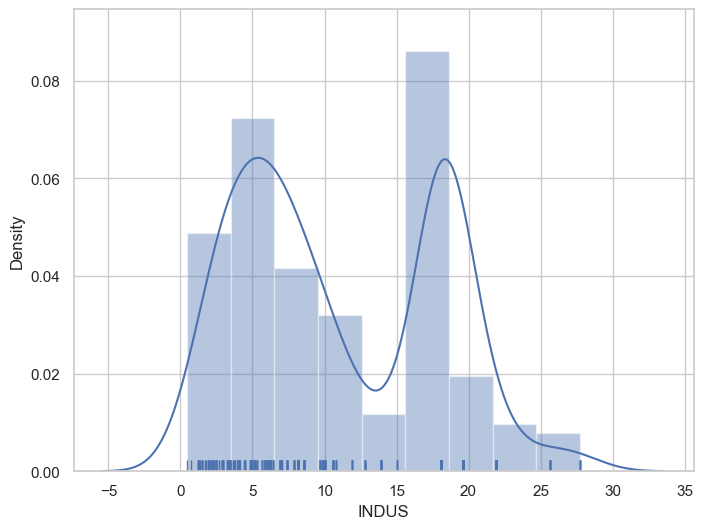

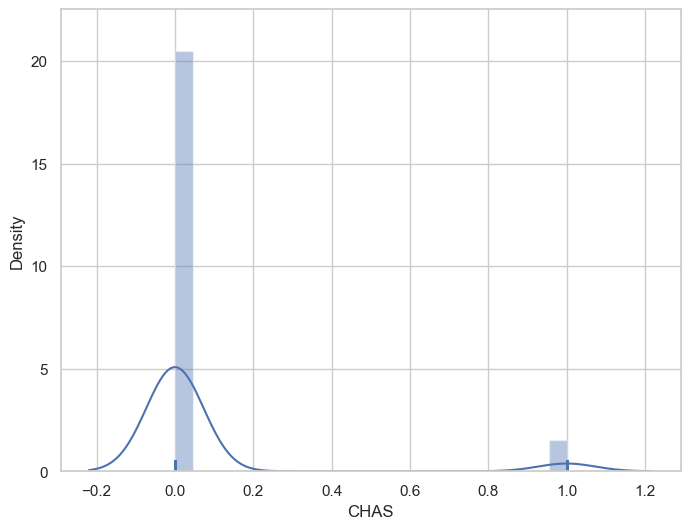

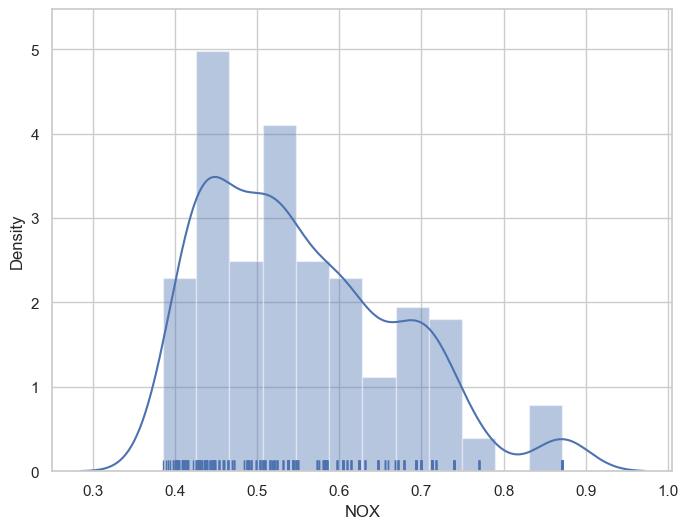

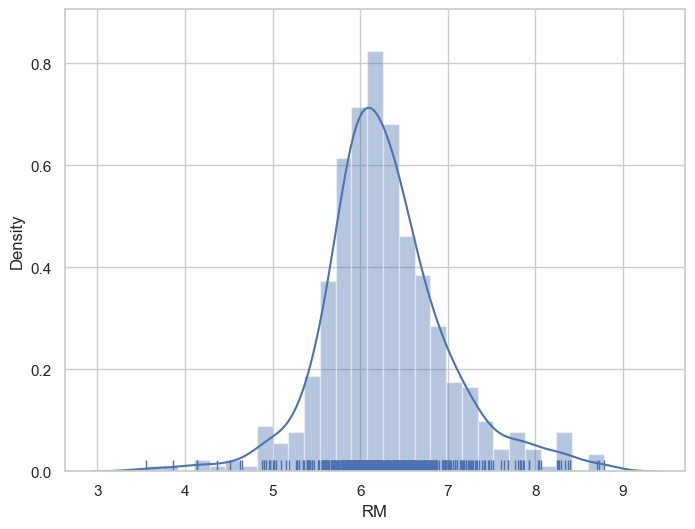

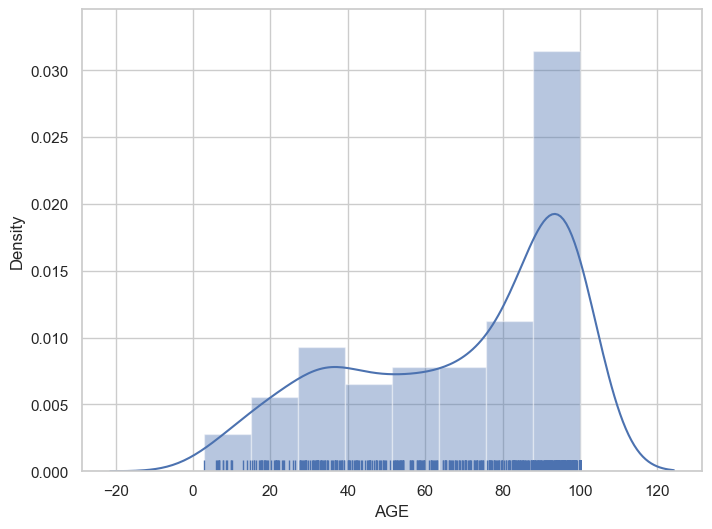

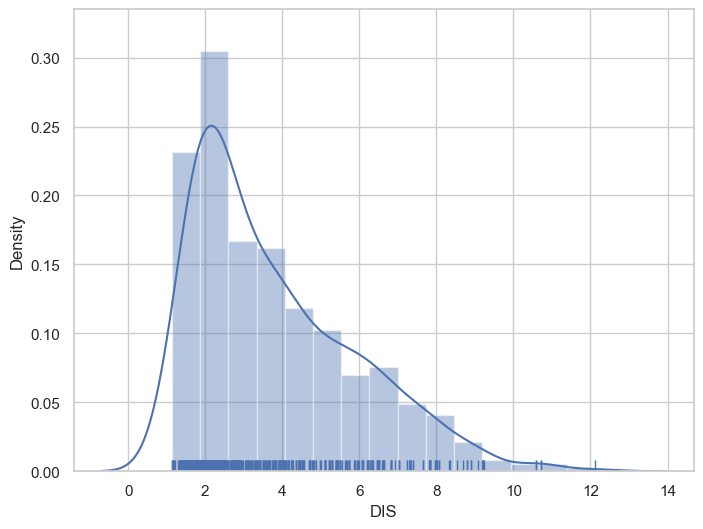

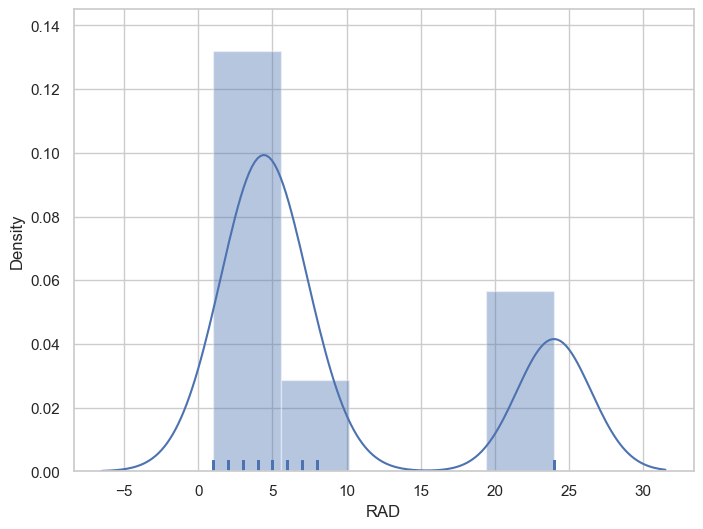

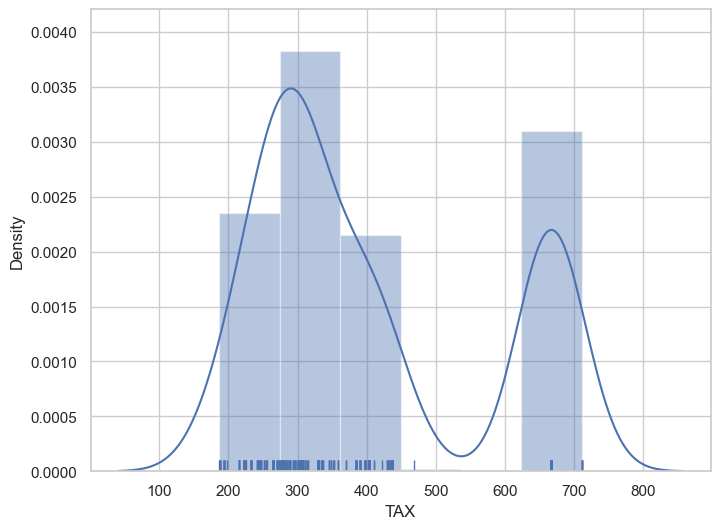

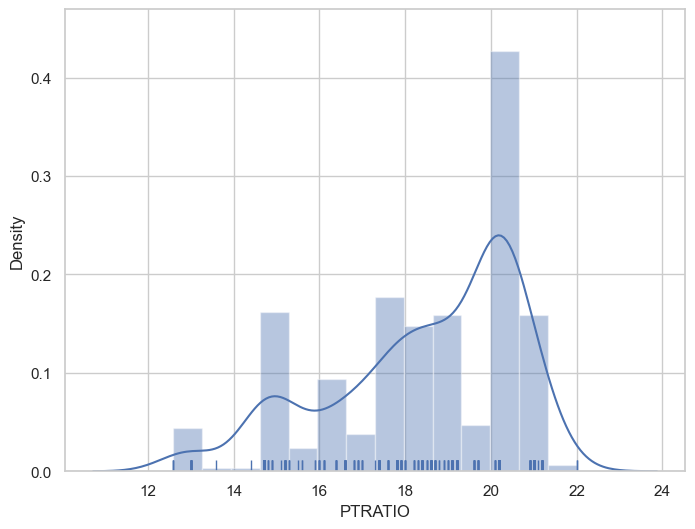

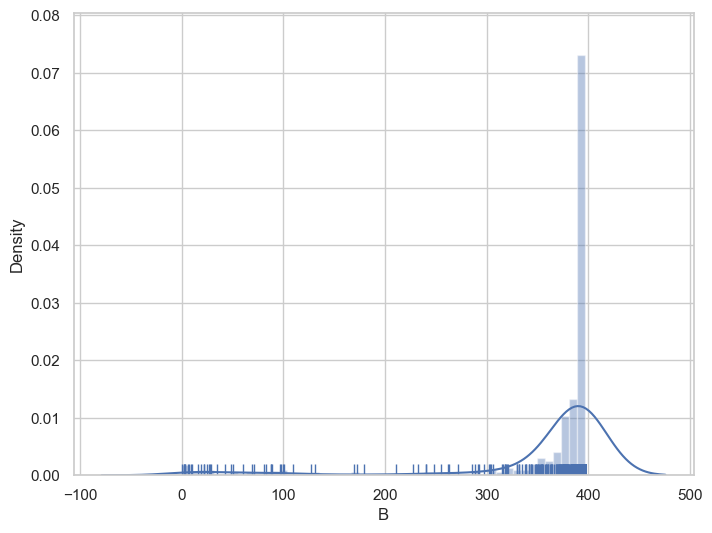

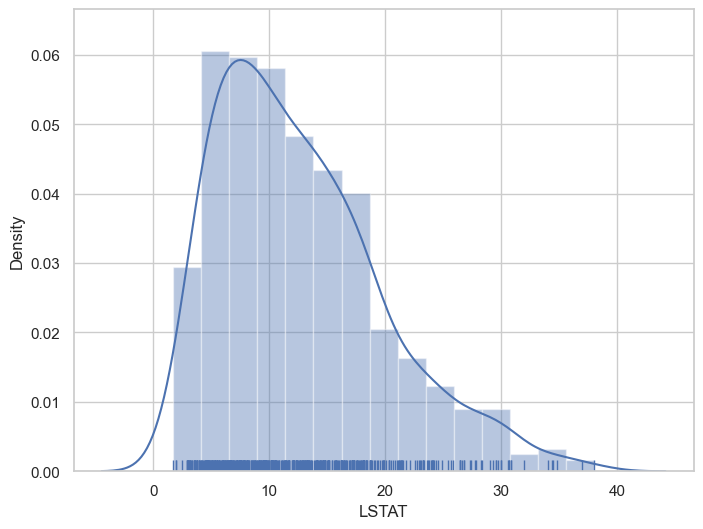

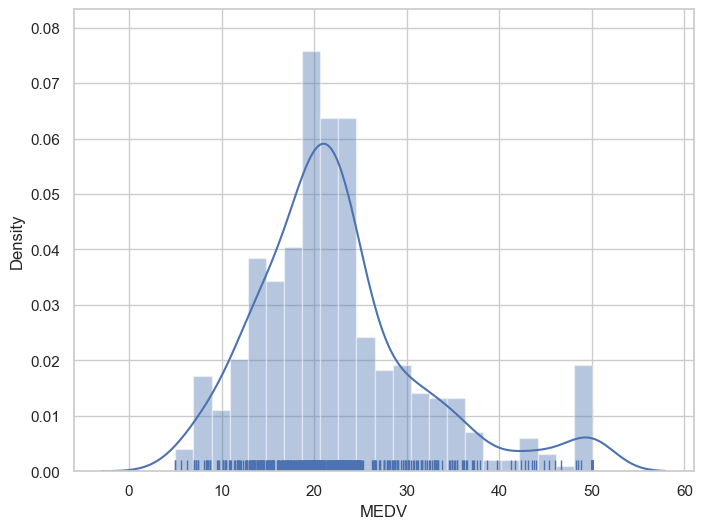

In [8]:
plt.figure(figsize=(8, 6))
sb.distplot(boston['CRIM'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['ZN'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['INDUS'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['CHAS'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['NOX'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['RM'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['AGE'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['DIS'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['RAD'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['TAX'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['PTRATIO'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['B'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['LSTAT'], rug = True)

plt.figure(figsize=(8, 6))
sb.distplot(boston['MEDV'], rug = True)


# Feature Observation

<Figure size 200x200 with 0 Axes>

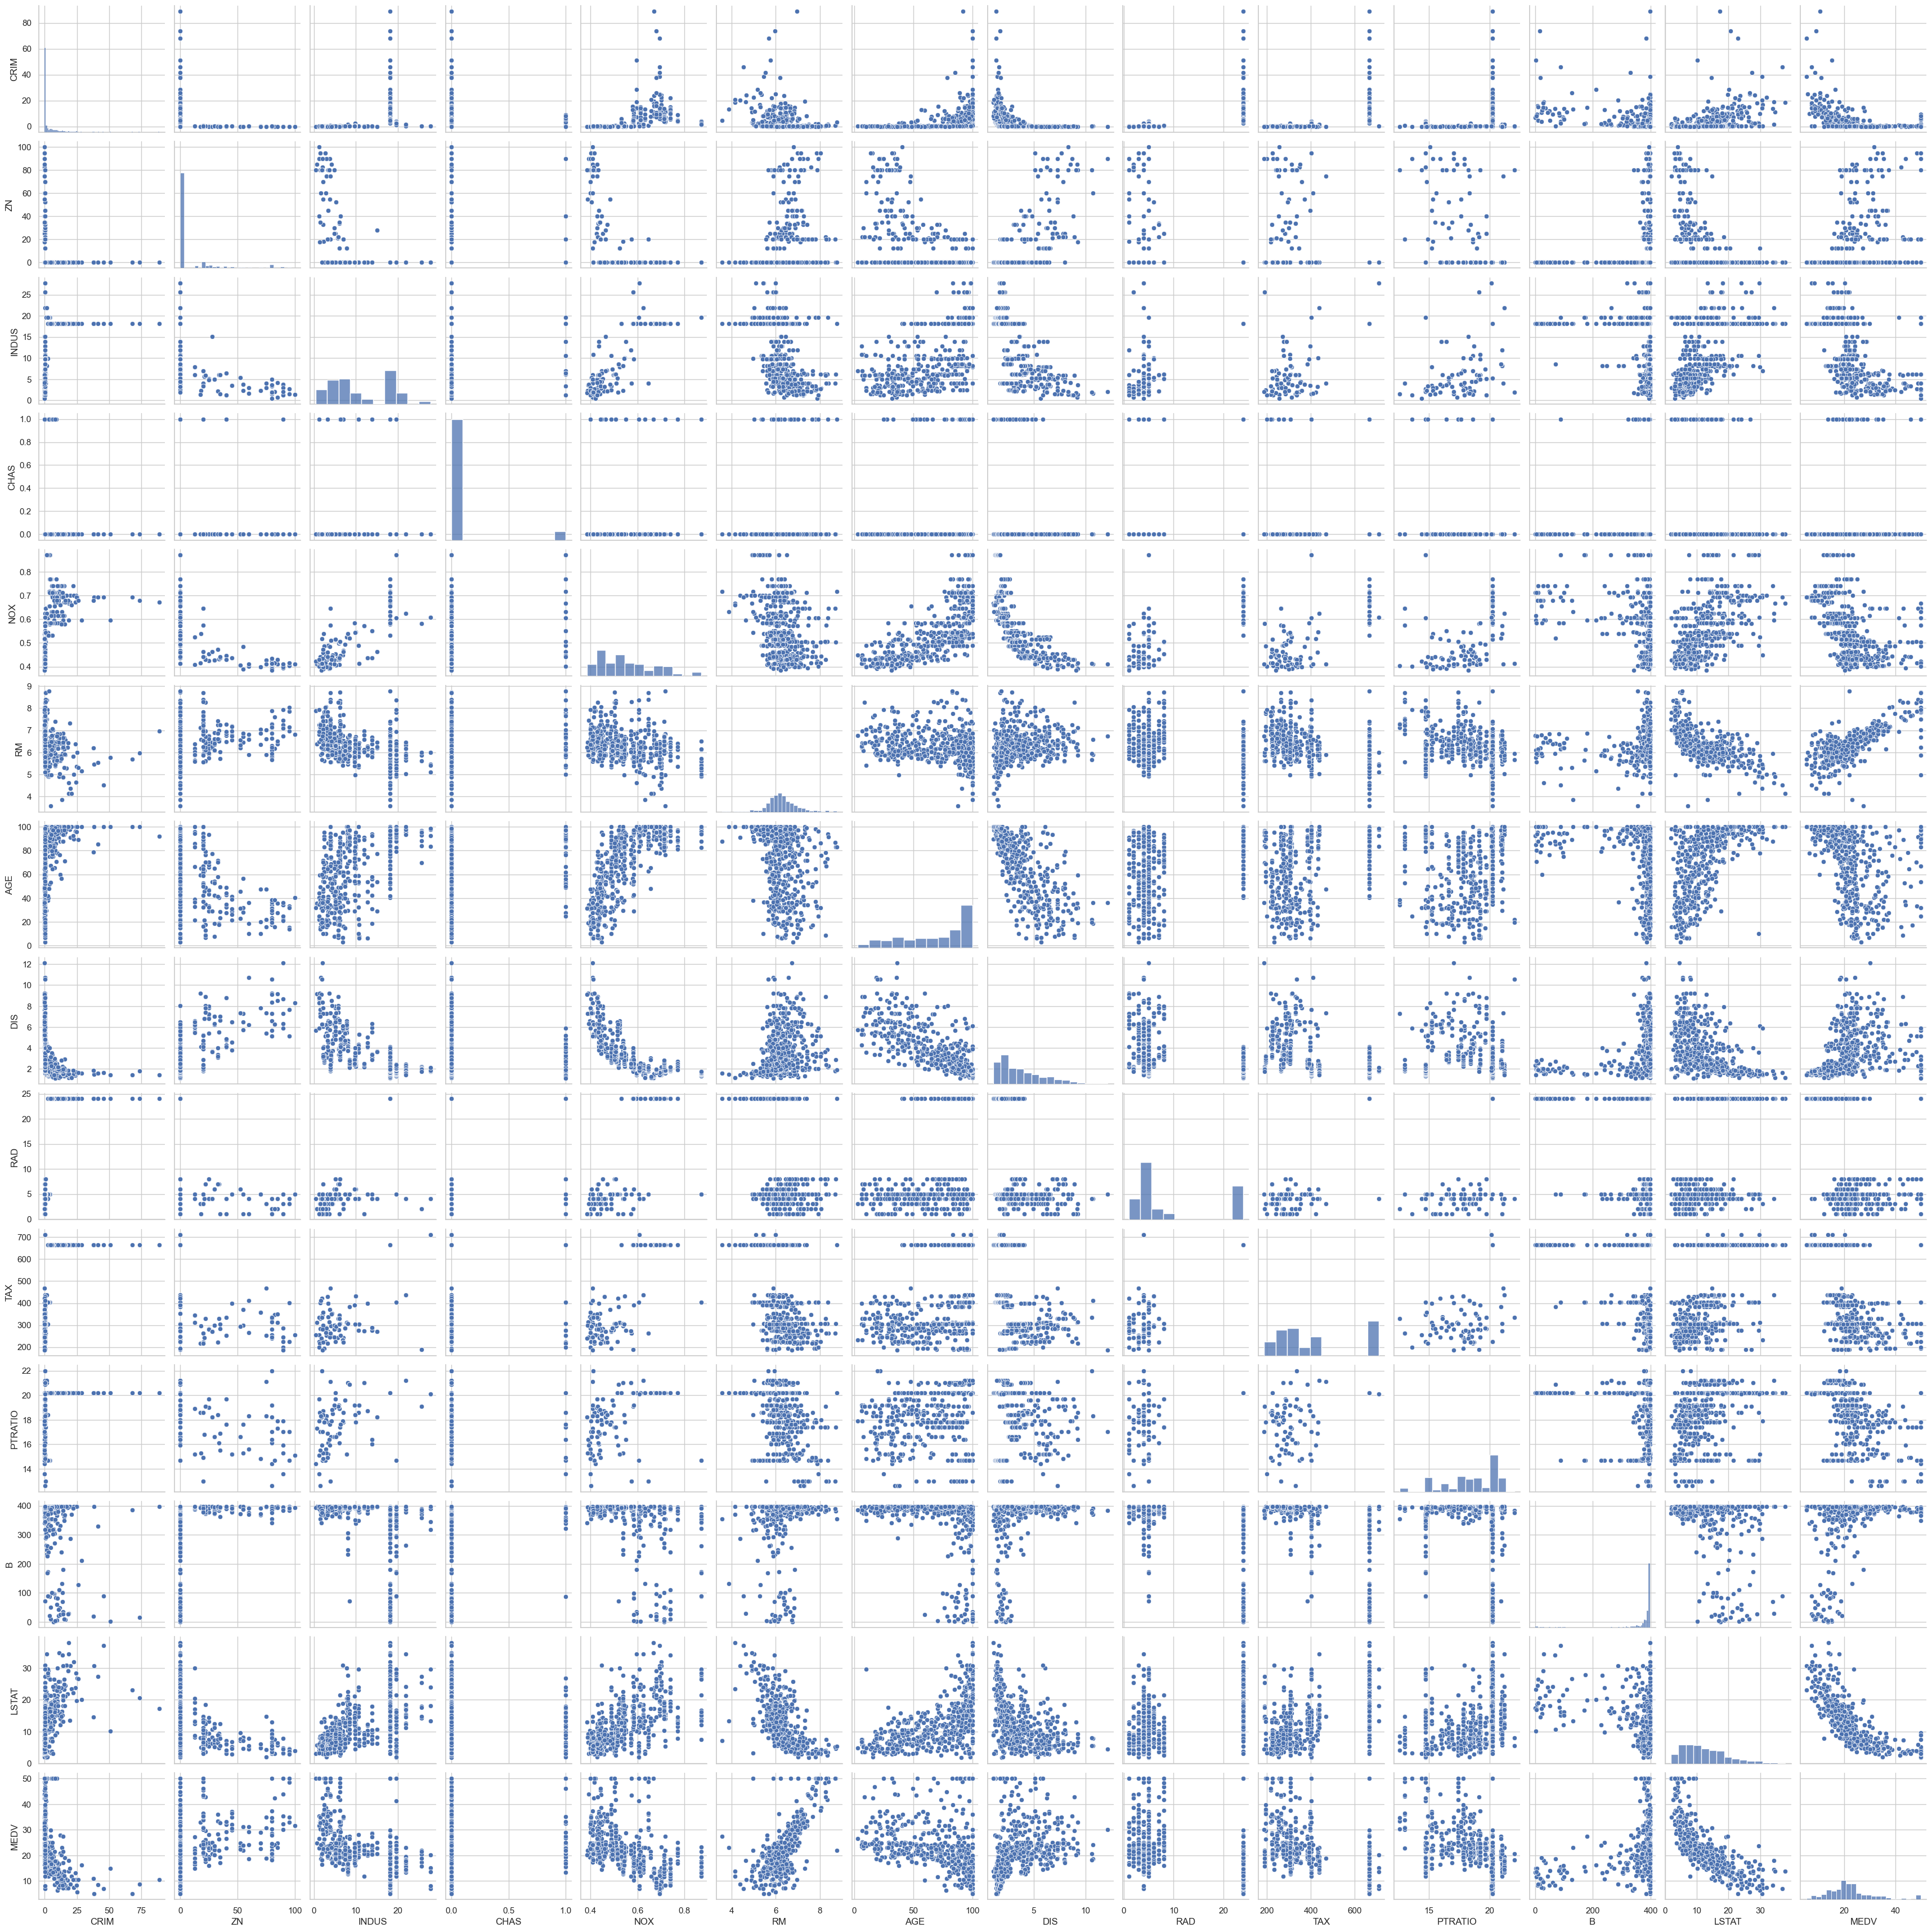

In [9]:
plt.figure(figsize 
           = (2, 2))
sb.pairplot(boston)


In [10]:
correlation_matrix = boston.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

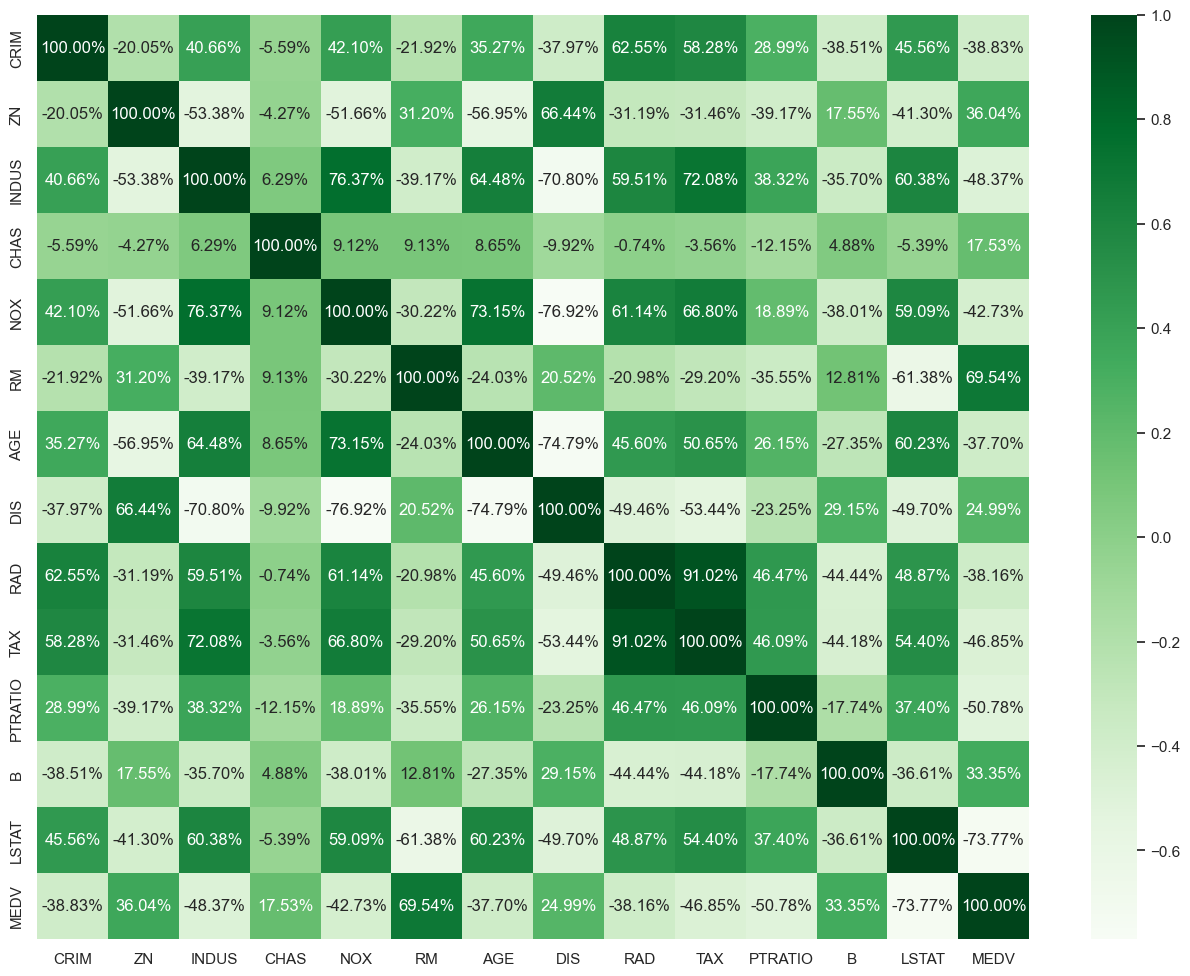

In [11]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(correlation_matrix, cmap = 'Greens', annot = True, fmt = '.2%')
plt.show()

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
dtype: float64


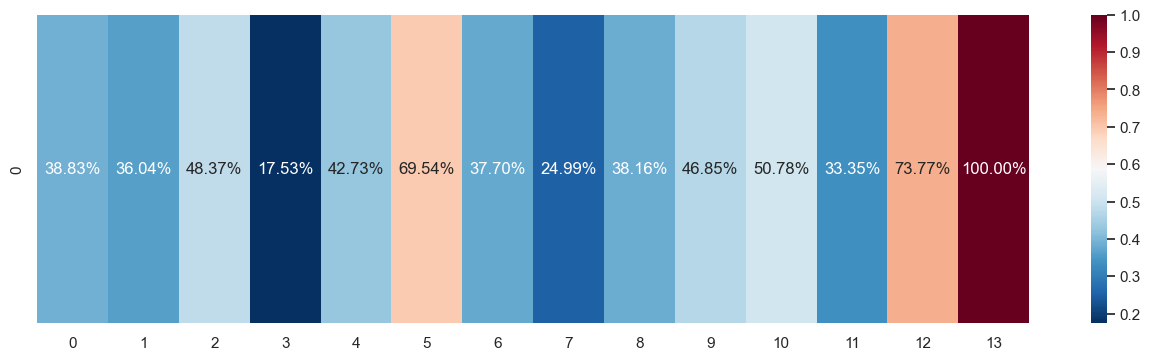

In [12]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])
print(corr_with_medv)
plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.show()

In [13]:
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [14]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = boston['MEDV'].values
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        3.199151
ZN          0.696359
INDUS       3.857033
CHAS        1.280183
NOX         4.141295
RM         31.038779
AGE         1.923866
DIS         3.148130
RAD         1.922951
TAX         4.161596
PTRATIO     6.184552
B           1.865340
LSTAT      36.580766
dtype: float64

In [15]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

LSTAT      36.580766
RM         31.038779
PTRATIO     6.184552
TAX         4.161596
NOX         4.141295
INDUS       3.857033
CRIM        3.199151
DIS         3.148130
AGE         1.923866
RAD         1.922951
B           1.865340
CHAS        1.280183
ZN          0.696359
dtype: float64

In [16]:
# Feature Impotances by Correlation Matrix
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

### It says same approimately

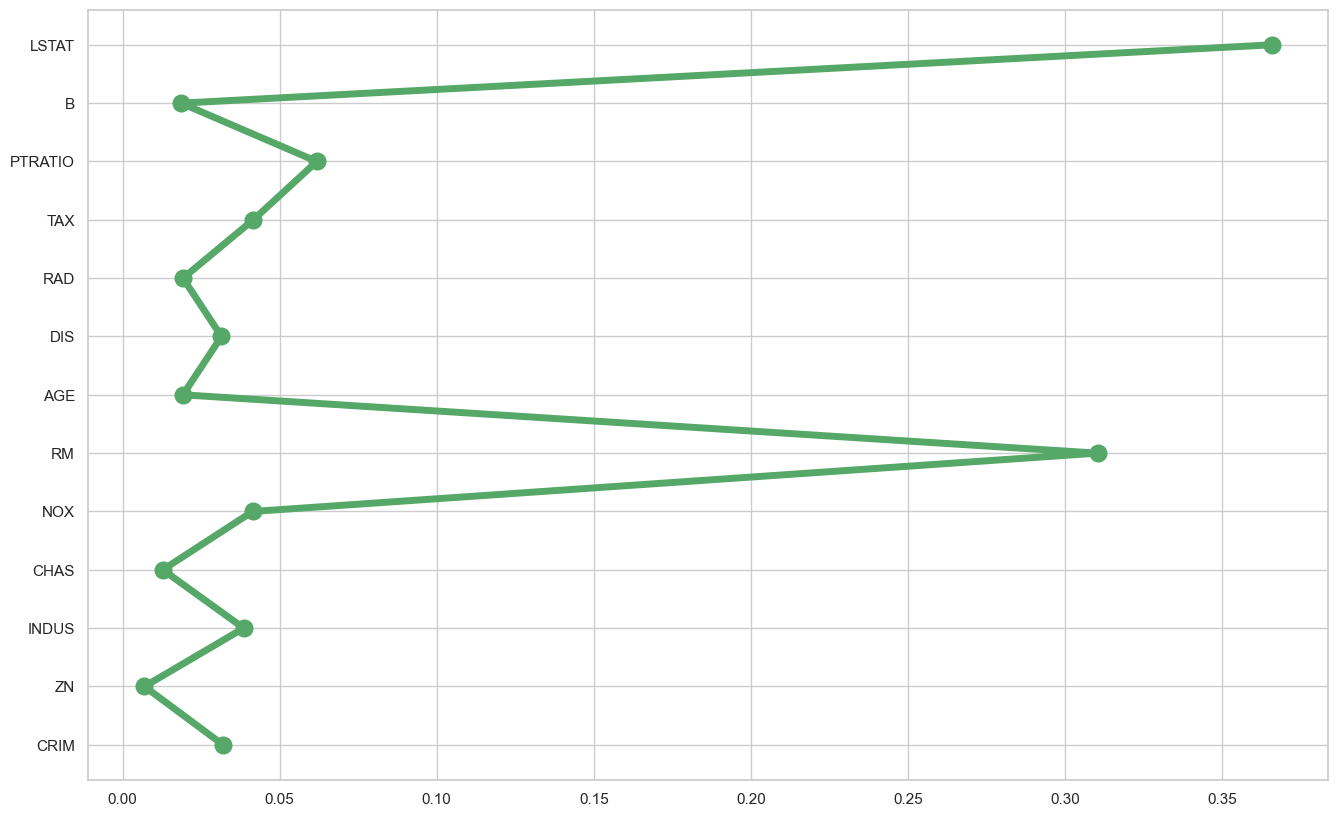

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, boston.columns[:-1], 'go-', linewidth=5, markersize=12)

### From the above feature observations, we found that some columns are most important such as LSTAT and RM

# Building Machine Learning Model

In [18]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'TAX', 'NOX', 'INDUS', 'CRIM', 'DIS', 'AGE',
       'RAD', 'B', 'CHAS', 'ZN'],
      dtype='object')

In [19]:
y = boston.loc[:, 'MEDV'].values

In [20]:
# Arranging columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,TAX,NOX,INDUS,CRIM,DIS,AGE,RAD,B,CHAS,ZN
0,4.98,6.575,15.3,296.0,0.538,2.31,0.00632,4.0900,65.2,1,396.90,0,18.0
1,9.14,6.421,17.8,242.0,0.469,7.07,0.02731,4.9671,78.9,2,396.90,0,0.0
2,4.03,7.185,17.8,242.0,0.469,7.07,0.02729,4.9671,61.1,2,392.83,0,0.0
3,2.94,6.998,18.7,222.0,0.458,2.18,0.03237,6.0622,45.8,3,394.63,0,0.0
4,5.33,7.147,18.7,222.0,0.458,2.18,0.06905,6.0622,54.2,3,396.90,0,0.0


In [21]:
# Getting boston values
X = new_boston.values
X = X[:, :6]

# TODO : Splitting data as train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<br><br><br><br><br><br><br>

## Random Forest

In [30]:


# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation

print('Training Score : ', reg.score(X_train, y_train))
print('Testing Score  : ', reg.score(X_test, y_test))


print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))



Training Score :  0.9754327417555961
Testing Score  :  0.8251033852497601
R^2: 0.9754327417555961
Adjusted R^2: 0.975061448180114
MAE: 0.9514752475247518
MSE: 2.1342413465346537
RMSE: 1.4609042906825394


In [31]:

reg_model = make_pipeline(MinMaxScaler(), RandomForestRegressor())
reg_model.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation

print('Training Score : ', reg.score(X_train, y_train))
print('Testing Score  : ', reg.score(X_test, y_test))

print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

Training Score :  0.9754327417555961
Testing Score  :  0.8251033852497601
R^2: 0.9754327417555961
Adjusted R^2: 0.975061448180114
MAE: 0.9514752475247518
MSE: 2.1342413465346537
RMSE: 1.4609042906825394
